In [94]:
import pulp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 7

In [55]:
train = pd.DataFrame.from_csv('marketing_dataset/train.csv')
train

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,60,services,married,tertiary,no,4256,yes,no,cellular,16,aug,239,3,761,1,other,yes
1,25,student,single,secondary,no,154,no,no,cellular,3,mar,141,1,180,2,failure,yes
2,38,services,married,secondary,no,507,yes,no,cellular,17,apr,55,1,344,1,failure,no
3,40,management,single,tertiary,no,1361,no,no,cellular,29,jan,1473,1,-1,0,unknown,yes
4,39,technician,married,secondary,no,834,yes,yes,cellular,20,apr,390,1,-1,0,unknown,no
5,36,management,married,tertiary,no,2987,yes,no,cellular,12,aug,307,1,-1,0,unknown,yes
6,40,entrepreneur,married,tertiary,no,1953,yes,no,unknown,6,jun,112,5,-1,0,unknown,no
7,51,services,single,secondary,no,513,yes,no,cellular,29,jul,331,2,-1,0,unknown,no
8,51,retired,married,primary,no,1495,no,no,telephone,25,jul,1946,4,-1,0,unknown,yes
9,38,management,single,tertiary,no,6836,yes,no,unknown,29,may,374,4,-1,0,unknown,no


In [56]:
wszystkie=np.array(train)
X=wszystkie[:,:-1]
y=wszystkie[:,-1]

In [57]:
X

array([[60, 'services', 'married', ..., 761, 1, 'other'],
       [25, 'student', 'single', ..., 180, 2, 'failure'],
       [38, 'services', 'married', ..., 344, 1, 'failure'],
       ..., 
       [32, 'blue-collar', 'married', ..., -1, 0, 'unknown'],
       [50, 'management', 'married', ..., 98, 2, 'other'],
       [33, 'management', 'single', ..., -1, 0, 'unknown']], dtype=object)

In [58]:
y

array(['yes', 'yes', 'no', ..., 'yes', 'yes', 'no'], dtype=object)

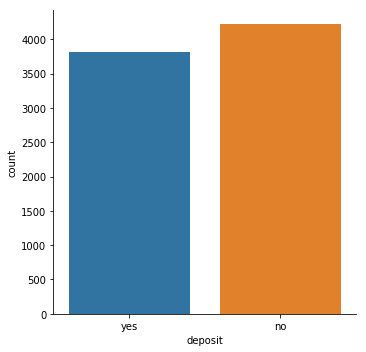

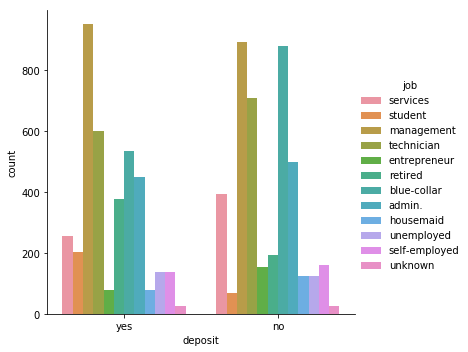

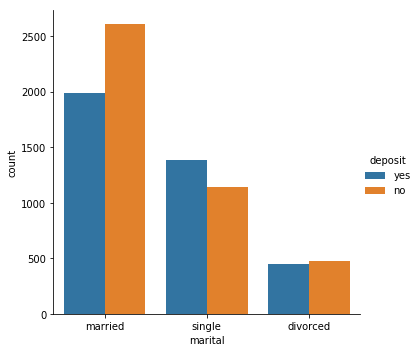

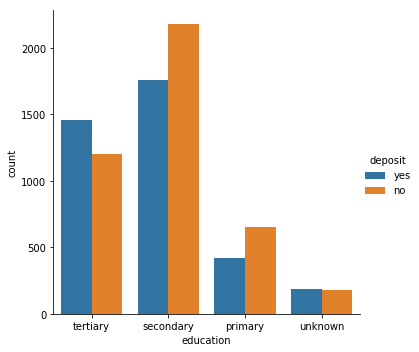

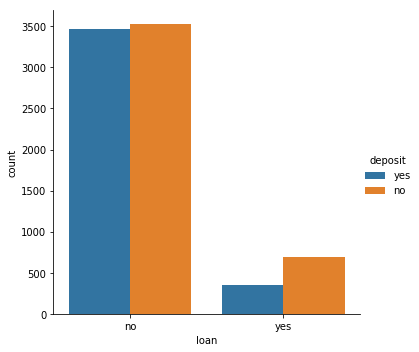

In [59]:
## Ile ludzi wzięło depozyt
sns.catplot('deposit',data=train, kind='count')
# Wizualizacja innych paramterów mających wpływ na dostanie kredytu
sns.catplot('deposit',data=train, hue='job', kind='count')
sns.catplot('marital',data=train, hue='deposit', kind='count')
sns.catplot('education',data=train, hue='deposit', kind='count')
sns.catplot('loan',data=train, hue='deposit', kind='count')

In [60]:
#Utworzenie kolumny wypełnionej jedynkami
train["deposit2"]=np.ones((len(train["deposit"]),1))
#zmiana jest wartości
train["deposit2"][train["deposit"]=="no"]=0

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [61]:
train["deposit2"]

0       1.0
1       1.0
2       0.0
3       1.0
4       0.0
5       1.0
6       0.0
7       0.0
8       1.0
9       0.0
10      0.0
11      1.0
12      0.0
13      1.0
14      1.0
15      0.0
16      0.0
17      1.0
18      0.0
19      1.0
20      0.0
21      0.0
22      0.0
23      0.0
24      1.0
25      1.0
26      0.0
27      1.0
28      1.0
29      0.0
       ... 
8006    1.0
8007    0.0
8008    0.0
8009    1.0
8010    1.0
8011    0.0
8012    1.0
8013    0.0
8014    0.0
8015    1.0
8016    1.0
8017    1.0
8018    0.0
8019    0.0
8020    0.0
8021    1.0
8022    1.0
8023    0.0
8024    0.0
8025    0.0
8026    0.0
8027    0.0
8028    0.0
8029    1.0
8030    1.0
8031    1.0
8032    1.0
8033    1.0
8034    1.0
8035    0.0
Name: deposit2, Length: 8036, dtype: float64

In [62]:
np.sum(train["deposit"]=="no")

4217

In [63]:
np.sum(train["deposit"]=="yes")

3819

In [64]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,deposit2
0,60,services,married,tertiary,no,4256,yes,no,cellular,16,aug,239,3,761,1,other,yes,1.0
1,25,student,single,secondary,no,154,no,no,cellular,3,mar,141,1,180,2,failure,yes,1.0
2,38,services,married,secondary,no,507,yes,no,cellular,17,apr,55,1,344,1,failure,no,0.0
3,40,management,single,tertiary,no,1361,no,no,cellular,29,jan,1473,1,-1,0,unknown,yes,1.0
4,39,technician,married,secondary,no,834,yes,yes,cellular,20,apr,390,1,-1,0,unknown,no,0.0
5,36,management,married,tertiary,no,2987,yes,no,cellular,12,aug,307,1,-1,0,unknown,yes,1.0
6,40,entrepreneur,married,tertiary,no,1953,yes,no,unknown,6,jun,112,5,-1,0,unknown,no,0.0
7,51,services,single,secondary,no,513,yes,no,cellular,29,jul,331,2,-1,0,unknown,no,0.0
8,51,retired,married,primary,no,1495,no,no,telephone,25,jul,1946,4,-1,0,unknown,yes,1.0
9,38,management,single,tertiary,no,6836,yes,no,unknown,29,may,374,4,-1,0,unknown,no,0.0


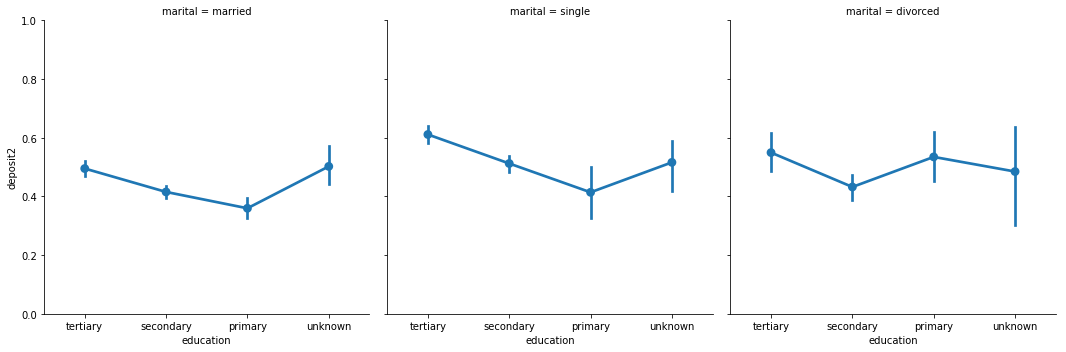

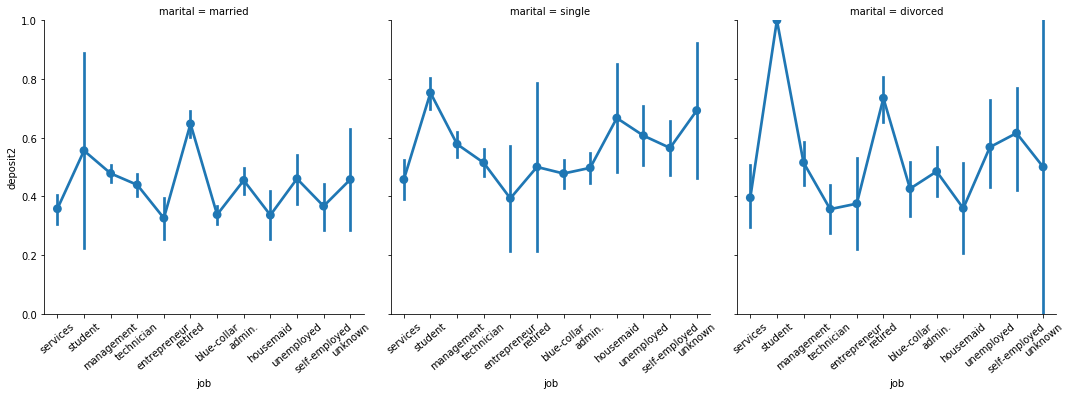

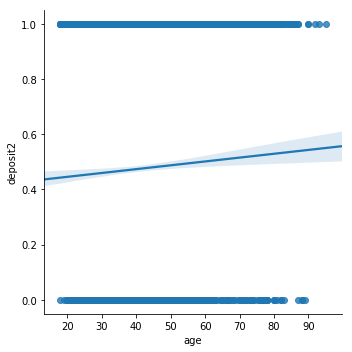

In [65]:
#kolejne ładne wizualizacje
sns.factorplot("education", "deposit2", col ='marital', data=train).set(ylim=(0, 1))
g = sns.factorplot("job", "deposit2", col ='marital', data=train).set(ylim=(0, 1))
g.set_xticklabels(rotation=40)
sns.lmplot("age", "deposit2", data = train);

In [157]:
cat_columns = ["loan","education","job","housing","contact","default","marital","poutcome","month"]
train_processed = pd.get_dummies(train, prefix_sep="_", columns=cat_columns)

In [158]:
train_processed

,age,balance,day,duration,campaign,pdays,previous,deposit,deposit2,loan_no,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,60,4256,16,239,3,761,1,yes,1.0,1,...,0,0,0,0,0,0,0,0,0,0
1,25,154,3,141,1,180,2,yes,1.0,1,...,0,0,0,0,0,1,0,0,0,0
2,38,507,17,55,1,344,1,no,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,40,1361,29,1473,1,-1,0,yes,1.0,1,...,0,0,1,0,0,0,0,0,0,0
4,39,834,20,390,1,-1,0,no,0.0,0,...,0,0,0,0,0,0,0,0,0,0
5,36,2987,12,307,1,-1,0,yes,1.0,1,...,0,0,0,0,0,0,0,0,0,0
6,40,1953,6,112,5,-1,0,no,0.0,1,...,0,0,0,0,1,0,0,0,0,0
7,51,513,29,331,2,-1,0,no,0.0,1,...,0,0,0,1,0,0,0,0,0,0
8,51,1495,25,1946,4,-1,0,yes,1.0,1,...,0,0,0,1,0,0,0,0,0,0
9,38,6836,29,374,4,-1,0,no,0.0,1,...,0,0,0,0,0,0,1,0,0,0


In [195]:
y_processed=np.array(train_processed[["deposit2"]])
x_processed=np.array(train_processed[["month_jan","month_feb","month_mar","month_apr","month_may","month_jun",
                                      "month_jul","month_aug","month_sep","month_oct","month_nov","month_dec",
                                      "poutcome_failure","poutcome_other","poutcome_success",
                                      "poutcome_unknown","loan_yes","loan_no","default_yes","default_no","campaign","pdays","age","duration",
                                      "balance","contact_cellular","contact_telephone","contact_unknown","housing_yes",
                                      "housing_no","job_services", "job_student",
                                      "job_management","education_tertiary","education_secondary",
                                      "education_primary","education_unknown", "job_technician", "job_entrepreneur", "job_retired",
                                      "job_blue-collar", "job_admin.", "job_housemaid", "job_unemployed",
                                      "job_self-employed", "job_unknown"]])

#podział zbioru testowego
X2, X_test, y2, y_test = train_test_split(x_processed, y_processed,
                                                    test_size=0.10,
                                                    random_state=RANDOM_STATE)
X_train, X_valid, y_train, y_valid = train_test_split(X2, y2,
                                                    test_size=0.80,
                                                    random_state=RANDOM_STATE)


clf = RandomForestClassifier(n_estimators=210, max_depth=20,
                             random_state=RANDOM_STATE)
clf.fit(X_train, y_train)

print(clf.score(X_valid, y_valid))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.832872450743
